In [17]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Reading dataset
position_salary_data = pd.read_csv('./data/Positions_Salary.csv')
position_salary_data.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [10]:
X = position_salary_data.iloc[:, 1:-1].values
y = position_salary_data.iloc[:, -1:].values

In [11]:
# Train Test split
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=100)

In [19]:
# Building simple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print(f'Model Coefficients : {model.coef_}')
print(f'Intercept : {model.intercept_}')

y_pred = model.predict(X)

score = model.score(X, y)
print(f'Score : {score}')

Model Coefficients : [[80878.78787879]]
Intercept : [-195333.33333333]
Score : 0.6690412331929895


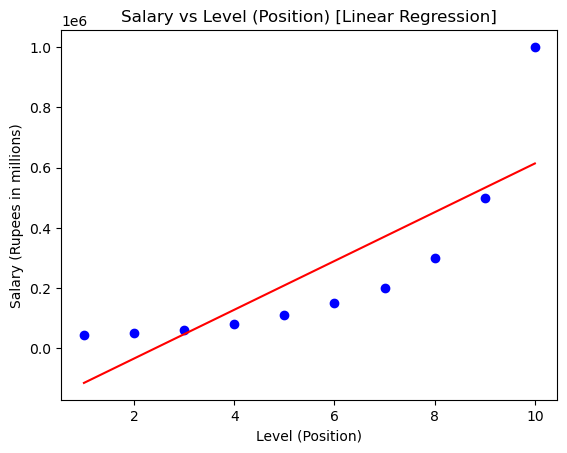

In [22]:
# Visualizing linear regression
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color = 'red')

plt.title("Salary vs Level (Position) [Linear Regression]")
plt.xlabel('Level (Position)')
plt.ylabel("Salary (Rupees in millions)")
plt.show()

Looking at the fitting curve, it looks like there is a polynomial relation between level and salary.

# Polynomial Regression

In [24]:
# Fitting the polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=4)

X_poly = poly_feature.fit_transform(X)
l_model = LinearRegression()
l_model.fit(X_poly, y)

y_poly_pred = l_model.predict(X_poly)

score = l_model.score(X_poly, y)

print(f'Model coefficients : {l_model.coef_}')
print(f'Intercepts : {l_model.intercept_}')
print(f'Score : {score}')

Model coefficients : [[      0.         -211002.33100266   94765.44289054  -15463.2867133
      890.15151515]]
Intercepts : [184166.66666707]
Score : 0.9973922891706614


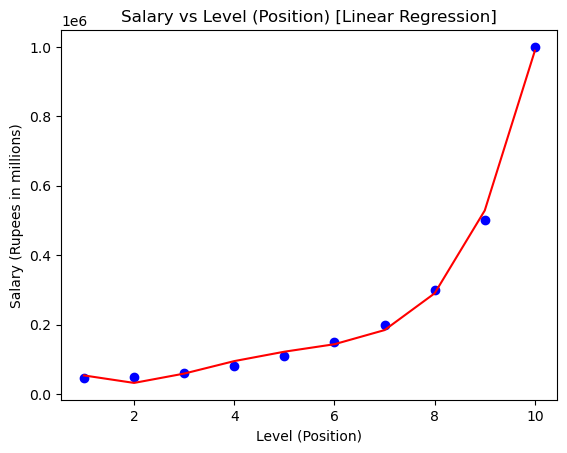

In [27]:
# Visualizing the polynomial regression
plt.scatter(X, y, color='blue')
plt.plot(X, y_poly_pred, color='red')

plt.title("Salary vs Level (Position) [Linear Regression]")
plt.xlabel('Level (Position)')
plt.ylabel("Salary (Rupees in millions)")
plt.show()

# Applying Regularization

In [33]:
# Applying Regularization: Lasso (L1) and Ridge (L2)

from sklearn.linear_model import Lasso, Ridge

# Lasso regularization example
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)
lasso_pred = lasso_reg.predict(poly_feature.fit_transform(X=[[6.5]]))

# Ridge regularization example
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_poly, y)
ridge_pred = ridge_reg.predict(poly_feature.fit_transform(X=[[6.5]]))

print(lasso_pred)
print(ridge_pred)

[136029.2955738]
[[149764.34573624]]


c:\Users\Mukund\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.088e+09, tolerance: 8.066e+07
  model = cd_fast.enet_coordinate_descent(


Inference:
- **Lasso Regularization** : predicts salary for position level (6.5) ~ Rs. 136,029.30
- **Ridge Regularization** : predicts salary for position level (6.5) ~ Rs. 149, 764.35

